Your task is to analyze survey data available at the following link: surveydata3.csv. The analysis includes estimating the mean with confidence intervals, standard error, minimum sample size for a specified precision, and estimating proportions.

- The data is loaded from the CSV file available at the following link: [surveydata3.csv](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3.csv).
- The dataset contains 753 rows and 55 columns, including various demographic and survey response variables.
- A detailed description of the dataset can be found [here](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3_description.csv).

**Instructions**

**Load the Data:**

- Load the data from the CSV file.
- Calculate the mean number of hours of sleep per night.
- Calculate the proportion of people who want to buy Udacity swag and prefer hoodies.

**Mean & Variance Estimation:**

- Calculate the mean and variance for the number of hours that Udemy students sleep per night.
- Calculate the confidence interval for the mean and variance.
- Calculate the standard error.
- Calculate the minimum sample size required to achieve a specified precision (e.g., 3%). 
- Visualize results with the boxplot (mean, std errors, confidence interval).

**Proportion Estimation:**

- Calculate the proportion for of people who want to buy Udacity swag and prefer hoodies :)
- Calculate the confidence interval for that proportion.
- Calculate the standard error.
- Calculate the minimum sample size required to achieve a specified precision (e.g., 3%).
- Visualize results with the boxplot (proportion, std errors, confidence interval).



2    7.0
3    7.0
4    8.0
5    6.0
6    8.0
Name: sleep hours per night, dtype: float64


(array([  1.,   0.,   0.,  14.,  27., 184., 318., 186.,  12.,   5.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

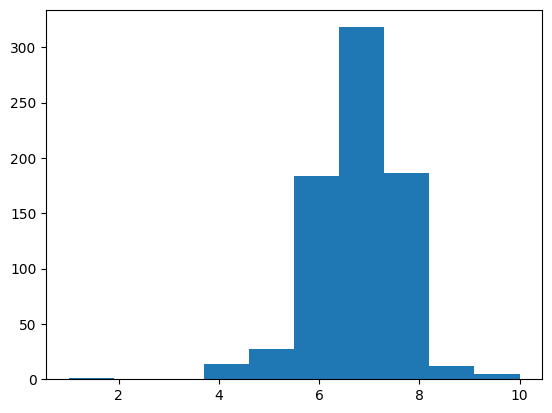

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/clean_surveydata3.xlsx?raw=true'
df = pd.read_excel(url, engine='openpyxl')
dane = df["sleep hours per night"]
dane = dane.dropna()
print(dane.head())

plt.hist(dane,bins=10)

In [5]:
import numpy as np
from scipy import stats
mean_sleep_time = np.mean(dane)
se_mean = stats.sem(dane)
relative_error = (se_mean/mean_sleep_time)*100
lower,upp = stats.t.interval(0.99, len(dane)-1, loc= mean_sleep_time, scale=se_mean)
print(f"Mean sleeping time: {mean_sleep_time:.2f}")
print(f"Standard error for the mean %: {relative_error:.2f}")
print(f"Confidence interval for the mean: ({lower:.2f},{upp:.2f})")

Mean sleeping time: 6.92
Standard error for the mean %: 0.52
Confidence interval for the mean: (6.82,7.01)


In [3]:
# confidence interval for SD (sleep time)
#stats.chi2(df=df_number).interval(0.95)

from scipy.stats import chi2
n=len(dane)
df_number = n-1
alpha = 0.05
sample_variance = np.var(dane)
sample_sd = np.sqrt(sample_variance)

chi2_lower = chi2.ppf(alpha/2, df_number)
chi2_upper = chi2.ppf(1-alpha/2, df_number)

ci_lower = (df_number*sample_variance)/chi2_upper
ci_upper = (df_number*sample_variance)/chi2_lower
ci_low = np.sqrt(ci_lower)
ci_up = np.sqrt(ci_upper)

print(f"Sample variance: {sample_variance:.2f}")
print(f"Sample sd: {sample_sd:.2f}")
print(f"Variance confidence interval: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"SD conf interval: ({ci_low:.2f},{ci_up:.2f})")

Sample variance: 0.97
Sample sd: 0.99
Variance confidence interval: (0.88, 1.08)
SD conf interval: (0.94,1.04)
